<a href="https://colab.research.google.com/github/Nao-Ishi/pray_py/blob/master/3pich_man_ani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pillow

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import math

No handles with labels found to put in legend.
No handles with labels found to put in legend.


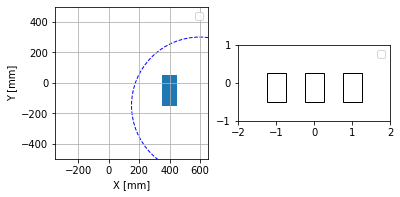

In [3]:
import matplotlib.patches as patches
###############################
#キャンパス設定

fig = plt.figure()
#plt.cla()
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.0, hspace=1.0)
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

Mx=650
mx=-350
My=500
my=-500

ax.set_xlim(mx,Mx)
ax.set_ylim(my,My)
ax.set_aspect('equal')

ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')

ax.grid(True)

ax.legend()
################################

cir_r = 450
cir_x = 600
cir_y = -150

rect_w = 100
rect_h = 200
rect_x = 400
rect_y = -150

################################
#   _________
#   |       |
#   |       |
#   |       |
#   |   .   |   (x,y)
#   ^^^^^^^^^
################################

c = patches.Circle(xy=(cir_x, cir_y), radius=cir_r, ec='b', ls='--',fill=False)
r = patches.Rectangle(xy=(rect_x-(rect_w/2), rect_y), width=rect_w, height=rect_h)
ax.add_patch(c)
ax.add_patch(r)

Mx=2
mx=-2
My=1
my=-1

ax2.set_xlim(mx,Mx)
ax2.set_ylim(my,My)
ax2.set_aspect('equal')

#ax2.set_xlabel('X [mm]')
#ax2.set_ylabel('Y [mm]')

#ax.grid(True)

ax2.legend()

r = patches.Rectangle(xy=(-1.25,-0.5 ), width=0.5, height=0.75, fill=False)
ax2.add_patch(r)
r = patches.Rectangle(xy=(-0.25,-0.5 ), width=0.5, height=0.75, fill=False)
ax2.add_patch(r)
r = patches.Rectangle(xy=(0.75,-0.5 ), width=0.5, height=0.75, fill=False)
ax2.add_patch(r)


#step_test = ax.plot(0.05,0.9,'',transform=ax.transAxes)
plt.show()

In [0]:
T = np.arange(130.0,195.0)
tag, = ax.plot([0], [0], 'yo')
p1, = ax.plot([0], [0], 'bo')
p2, = ax.plot([0], [0], 'ro')
p3, = ax.plot([0], [0], 'go')
l1, = ax.plot([0, 0], [0, 0], 'g')
l1_, = ax2.plot([0, 0], [0, 0], 'g')
l2, = ax.plot([0, 0], [0, 0], 'b')
l2_, = ax2.plot([0, 0], [0, 0], 'b')
l3, = ax.plot([0, 0], [0, 0], 'r')
l3_, = ax2.plot([0, 0], [0, 0], 'r')
L1 = 150
L2 = 250
PI = np.pi

Sheta = np.array([[0.0]*3 for i in range(len(T))])

def draw_ani(t):
    at = np.radians(T[t])
    xt = np.cos(at) * cir_r + cir_x
    yt = np.sin(at) * cir_r + cir_y
    ##########################
    #https://so-zou.jp/robot/tech/kinematics/inverse-kinematics.htm#
    alpha = np.arccos(
        ((-1)*(xt*xt+yt*yt)+L2*L2+L1*L1)
        /(2*L1*L2)
    )
    
    beta = np.arccos(
        ((-1)*(L2*L2)+(L1*L1)+(xt*xt+yt*yt))
        /(2*L1*np.sqrt(xt*xt+yt*yt))
    )
    sheta1 = np.arctan2(yt,xt)-beta
    sheta2 = (PI - alpha)
    ##########################
    xp1 = np.cos(sheta1)*L1
    yp1 = np.sin(sheta1)*L1
    p1.set_data(xp1,yp1)

    xp2 = np.cos(sheta1+sheta2)*L2
    yp2 = np.sin(sheta1+sheta2)*L2
    p2.set_data(xp1+xp2,yp1+yp2)

    sheta3 = np.arctan2(
        (-yp1-yp2+rect_y+rect_h/2)
        ,(-xp1-xp2+rect_x)
    )
    xp3 = np.cos(sheta3)*100
    yp3 = np.sin(sheta3)*100
    ##########################
    
    tag.set_data(xt, yt)
    l1.set_data([0,xp1],[0,yp1])
    l2.set_data([xp1,xp1+xp2],[yp1,yp1+yp2])
    l3.set_data([xp1+xp2,xp1+xp2+xp3],[yp1+yp2,yp1+yp2+yp3])
    ##########################
    
    xp1 = np.cos(sheta1)*0.5-1
    yp1 = np.sin(sheta1)*0.5
    l1_.set_data([-1,xp1],[0,yp1])

    xp2 = np.cos(sheta2)*0.5
    yp2 = np.sin(sheta2)*0.5
    l2_.set_data([0,xp2],[0,yp2])

    xp3 = np.cos(sheta3)*0.5+1
    yp3 = np.sin(sheta3)*0.5
    l3_.set_data([1,xp3],[0,yp3])
    ##########################
    Sheta[t][0]=sheta1
    Sheta[t][1]=sheta2-(PI/4)
    Sheta[t][2]=sheta3
    return tag, #p1, p2, p3, l1, l2, l3, l1_,
  
ani = animation.FuncAnimation(
      fig,  # Figureオブジェクト
      draw_ani,  # グラフ描画関数
      frames = len(T),  # フレームを設定
      interval = 100,  # 更新間隔(ms)
      repeat = True,  # 描画を繰り返す
      blit = True  # blitting による処理の高速化
      )

ani.save('normaldist_kde_anim.gif', writer='pillow')
plt.show()

In [13]:
Sheta_deg = np.array([[0.0]*3 for i in range(len(T))])
Sheta_deg = Sheta*180/PI
print(Sheta_deg)

[[   1.2529119     3.72179227  -69.96204571]
 [  -2.52011114    9.22777622  -68.32674533]
 [  -6.04290987   14.25183145  -66.66832803]
 [  -9.38759888   18.90621149  -64.98687468]
 [ -12.6027918    23.26496942  -63.2825406 ]
 [ -15.72345783   27.37981741  -61.55556087]
 [ -18.7760545    31.28838832  -59.80625554]
 [ -21.78143696   35.0189201   -58.03503428]
 [ -24.75661501   38.59308713  -56.24240075]
 [ -27.71586628   42.02779866  -54.42895616]
 [ -30.67146666   45.33638667  -52.59540219]
 [ -33.63418026   48.52941484  -50.74254299]
 [ -36.61359007   51.61524248  -48.87128619]
 [ -39.61831734   54.60042424  -46.98264276]
 [ -42.65615791   57.48999602  -45.0777257 ]
 [ -45.73415297   60.28767984  -43.15774735]
 [ -48.85860345   62.9960292   -41.22401546]
 [ -52.03503334   65.61652975  -39.27792774]
 [ -55.26810362   68.14966591  -37.32096513]
 [ -58.56147693   70.59496098  -35.35468378]
 [ -61.91763232   72.95099716  -33.38070562]
 [ -65.33762994   75.21542071  -31.400708  ]
 [ -68.820

In [32]:
Sheta_krs = np.array([[0.0]*3 for i in range(len(T))])
Sheta_krs_i = np.array([[0]*3 for i in range(len(T))])
Sheta_krs = Sheta_deg/270*4000+7500
#print(Sheta_krs)
for i in range(len(Sheta_krs)):
  for j in range(len(Sheta_krs[0])):
    Sheta_krs_i[i][j] = int(Sheta_krs[i][j])
print(Sheta_krs_i)

[[7518 7555 6463]
 [7462 7636 6487]
 [7410 7711 6512]
 [7360 7780 6537]
 [7313 7844 6562]
 [7267 7905 6588]
 [7221 7963 6613]
 [7177 8018 6640]
 [7133 8071 6666]
 [7089 8122 6693]
 [7045 8171 6720]
 [7001 8218 6748]
 [6957 8264 6775]
 [6913 8308 6803]
 [6868 8351 6832]
 [6822 8393 6860]
 [6776 8433 6889]
 [6729 8472 6918]
 [6681 8509 6947]
 [6632 8545 6976]
 [6582 8580 7005]
 [6532 8614 7034]
 [6480 8646 7064]
 [6427 8677 7093]
 [6374 8706 7123]
 [6320 8733 7152]
 [6266 8759 7181]
 [6211 8783 7211]
 [6156 8805 7240]
 [6101 8825 7269]
 [6047 8842 7298]
 [5994 8857 7327]
 [5942 8870 7355]
 [5893 8880 7384]
 [5845 8887 7412]
 [5801 8891 7440]
 [5760 8892 7468]
 [5722 8891 7495]
 [5688 8886 7522]
 [5658 8879 7549]
 [5632 8869 7576]
 [5610 8856 7602]
 [5592 8841 7628]
 [5578 8823 7653]
 [5567 8803 7678]
 [5560 8781 7703]
 [5556 8757 7728]
 [5554 8731 7752]
 [5556 8704 7776]
 [5560 8674 7799]
 [5566 8644 7822]
 [5575 8611 7845]
 [5586 8578 7868]
 [5598 8543 7890]
 [5613 8506 7912]
 [5629 846